In [1]:
import zarrdataset as zds
import zarr

In [2]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = ["https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"]

In [3]:
import random
import numpy as np

# For reproducibility
np.random.seed(478963)
random.seed(478965)

In [4]:
patch_size = dict(Y=512, X=512)
patch_sampler = zds.PatchSampler(patch_size=patch_size)

In [5]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="0",
  source_axes="TCZYX",
)

# The LabelsDatasetSpecs class can be used as guide to include the minimum specifications to load the labels from the dataset.
# This example uses a single label for the whole image.
labels_specs = zds.LabelsDatasetSpecs(
  filenames=[np.array([1])],
  source_axes="L",
)

my_dataset = zds.ZarrDataset([image_specs, labels_specs],
                             patch_sampler=patch_sampler,
                             shuffle=True)

In [6]:
for i, (sample, label) in enumerate(my_dataset):
    print(f"Sample {i}, patch size: {sample.shape}, label: {label}")

    # Obtain only 5 samples
    if i >= 4:
        break

Sample 0, patch size: (1, 3, 1, 512, 512), label: [1]


Sample 1, patch size: (1, 3, 1, 512, 512), label: [1]


Sample 2, patch size: (1, 3, 1, 512, 512), label: [1]


Sample 3, patch size: (1, 3, 1, 512, 512), label: [1]


Sample 4, patch size: (1, 3, 1, 512, 512), label: [1]


In [7]:
from skimage import color, filters, morphology

z_img = zarr.open(filenames[0], mode="r")

im_gray = color.rgb2gray(z_img["4"][0, :, 0], channel_axis=0)
thresh = filters.threshold_otsu(im_gray)

labels = im_gray > thresh
labels = morphology.remove_small_objects(labels == 0, min_size=16 ** 2,
                                         connectivity=2)
labels = morphology.remove_small_holes(labels, area_threshold=128)
labels = morphology.binary_erosion(labels, morphology.disk(3))
labels = morphology.binary_dilation(labels, morphology.disk(16))

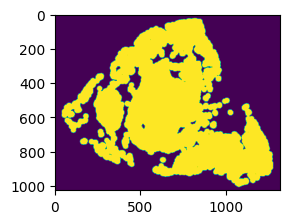

In [8]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(np.moveaxis(z_img["4"][0, :, 0], 0, -1))
plt.subplot(1, 2, 1)
plt.imshow(labels)
plt.show()

In [9]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="0",
  source_axes="TCZYX",
)

# A list with a labeled image, for the single image in the dataset, is passed as `filenames` argument.
labels_specs = zds.LabelsDatasetSpecs(
  filenames=[labels],
  source_axes="YX",
)

my_dataset = zds.ZarrDataset([image_specs, labels_specs],
                             patch_sampler=patch_sampler,
                             shuffle=True)

Sample 0, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 1, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 2, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 3, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 4, patch size: (1, 3, 1, 512, 512), label: (32, 33)


Sample 5, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 6, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 7, patch size: (1, 3, 1, 512, 512), label: (33, 33)


Sample 8, patch size: (1, 3, 1, 512, 512), label: (33, 33)


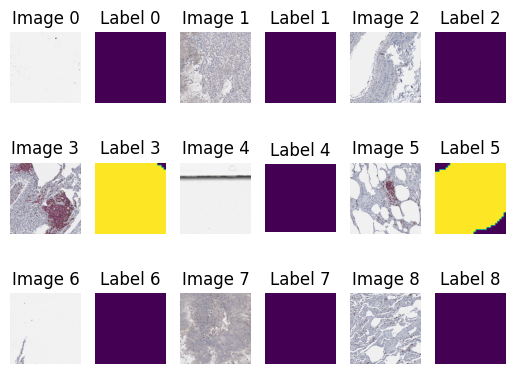

In [10]:
fig, ax = plt.subplots(3, 6)
for i, (sample, label) in enumerate(my_dataset):
    print(f"Sample {i}, patch size: {sample.shape}, label: {label.shape}")

    ax[i // 3, 2 * (i % 3)].imshow(sample[0, :, 0].transpose(1, 2, 0))
    ax[i // 3, 2 * (i % 3)].set_title(f"Image {i}")
    ax[i // 3, 2 * (i % 3)].axis("off")

    ax[i // 3, 2 * (i % 3) + 1].imshow(label)
    ax[i // 3, 2 * (i % 3) + 1].set_title(f"Label {i}")
    ax[i // 3, 2 * (i % 3) + 1].axis("off")

    # Obtain only 9 samples
    if i >= 8:
        break

plt.show()